In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

In [10]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()
X_train.shape
X_test.shape

(10000, 28, 28)

In [11]:
X_train = X_train.reshape(60000, 28, 28,1)
X_test = X_test.reshape(10000, 28, 28,1)


In [12]:
num_classes = 10

In [13]:
print(y_train[0])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape = (28,28,1)))
model.add(Conv2D(filters=64, kernel_size= (3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(39,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                      

In [16]:
model.compile(loss= keras.losses.categorical_crossentropy, optimizer= keras.optimizers.Adadelta(), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size= 40, epochs= 10, validation_data=(X_test,y_test), verbose= 1)

score = model.evaluate(X_test, y_test)
print(score)

Epoch 1/10
1500/1500 [==============================] - 14s 4ms/step - loss: 9.0644 - accuracy: 0.1244 - val_loss: 2.0665 - val_accuracy: 0.2295
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 2.6337 - accuracy: 0.1459 - val_loss: 2.1436 - val_accuracy: 0.2246
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 2.2801 - accuracy: 0.1640 - val_loss: 2.0567 - val_accuracy: 0.2620
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 2.1724 - accuracy: 0.1975 - val_loss: 1.9278 - val_accuracy: 0.3156
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 2.0853 - accuracy: 0.2353 - val_loss: 1.7549 - val_accuracy: 0.4123
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 2.0047 - accuracy: 0.2776 - val_loss: 1.5960 - val_accuracy: 0.4879
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 1.9246 - accuracy: 0.3123 - val_loss: 1.4665 - val_accuracy

313/313 [==============================] - 1s 4ms/step - loss: 1.1698 - accuracy: 0.6491
Test Accuracy: 64.91%


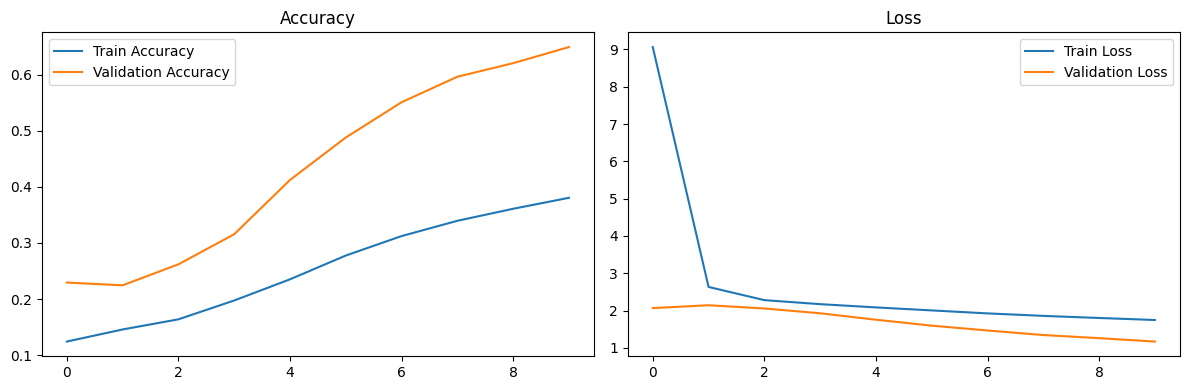

In [17]:
import matplotlib.pyplot as plt
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plotting the training accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()